In [175]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Load your CSV file
df = pd.read_csv('../Archive/sanitized_property_listings_Kelli.csv')

# Check if df is None
if df is None:
    print("DataFrame not loaded correctly, df is None.")
else:
    print("DataFrame loaded successfully.")

# Display the first few rows in a more readable format
display(df.head(10))

# Check the shape of the DataFrame
print(df.shape)  # This will display the shape of the DataFrame


DataFrame loaded successfully.


,Unnamed: 0,Property ID,Locality data,Price,Property type,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Open fire,Terrace surface m²,Garden area m²,Number of facades,Swimming pool,Building condition
0,0,20245694,9550,198800,house,3.0,125.0,0,0,1,45.0,106.0,2.0,0,To renovate
1,1,20246399,2170,349000,house,3.0,193.0,1,0,1,NaN,53.0,2.0,0,To be done up
2,2,20245215,4102,199900,house,3.0,131.0,1,0,1,40.0,30.0,2.0,0,As new
3,3,20245396,9620,349000,house,4.0,237.0,0,0,1,16.0,390.0,4.0,0,To renovate
4,4,20245133,1200,795000,house,5.0,225.0,1,0,1,15.0,120.0,2.0,0,To renovate
5,5,20244275,8500,455000,house,4.0,187.0,1,0,1,NaN,100.0,NaN,0,Good
6,6,20244687,9860,455000,house,3.0,147.0,0,0,1,16.0,77.0,3.0,0,Just renovated
7,7,20241273,6220,315000,house,2.0,100.0,0,0,1,14.0,1030.0,4.0,0,To be done up
8,8,20242318,1120,477000,house,5.0,186.0,0,0,1,30.0,120.0,2.0,0,As new
9,9,20244297,4140,298000,house,4.0,242.0,1,0,1,80.0,147.0,2.0,0,Good


(10114, 15)


### Further data cleaning

In [176]:
df.drop(labels=['Number of facades'], axis=1, inplace=True)

In [177]:
# Drop rows with NaN in specific columns without assignment
df.dropna(subset=['Living area m²', 'Number of bedrooms', 'Building condition'], inplace=True)

# Check the new shape of df
print(df.shape)

df.to_csv("../Data/Cleaned/sanitized_property_listings_Kelli_final.csv", index=False)


(9033, 14)


### Find outliers for different datasets with Seaborn


#### Property Prices boxplot listings below 1 million euros

(8356, 14)


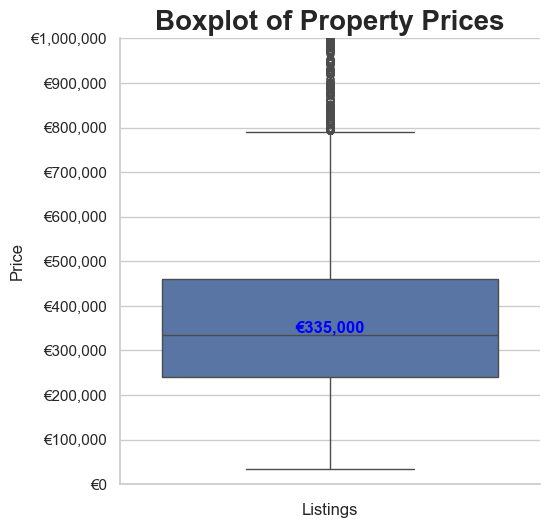

In [178]:
# Sort the DataFrame by 'Price' in descending order and exclude the first 16 rows. These were checked as 'bad data' outliers.
df_sorted = df.sort_values(by='Price', ascending=False).iloc[16:]
df_sorted = df[df['Price'] < 1000000]
print(df_sorted.shape)
sns.catplot(
    kind="box",
    y="Price",
    data=df_sorted
).set(xlabel='Listings',ylabel='Price')

plt.title('Boxplot of Property Prices', fontweight="bold", fontsize=20)
# Automatically format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 1000000)

# Set custom y-axis tick labels
yticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
plt.yticks(yticks, [f'€{y:,.0f}' for y in yticks])

# Calculate and annotate the median value on the plot
median_price = df_sorted['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, color='blue', fontweight='bold')

plt.show()

# Exclude properties about 1mil, and why. Collect list of assumptions. Together as a team say we do not work with houses over 1 mil and that's what the other should work with. 


### Comparing boxplots before and after manual outlier removal calculation
Conclusion:
    The first boxplot (before outlier removal) is useful to understand the full range and outlier impact on property prices.
    The second boxplot (after outlier removal) gives a better representation of the central market trends and is less affected by extreme values.
    By comparing the two boxplots, you can see how outliers impact the central tendency (median) and the spread of data. Removing them provides a cleaner and more focused view of the typical property prices.

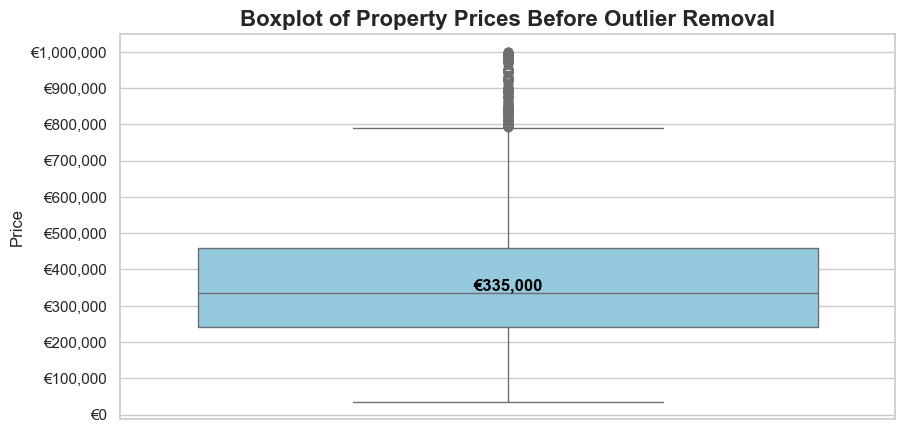

In [179]:
# Plot before outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(y='Price', data=df_sorted, color="skyblue")
plt.title('Boxplot of Property Prices Before Outlier Removal', fontsize=16, fontweight='bold')
plt.ylabel('Price')
plt.yticks(yticks, [f'€{y:,.0f}' for y in yticks])
median_price = df_sorted['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, color='black',
         fontweight='bold')
plt.show()


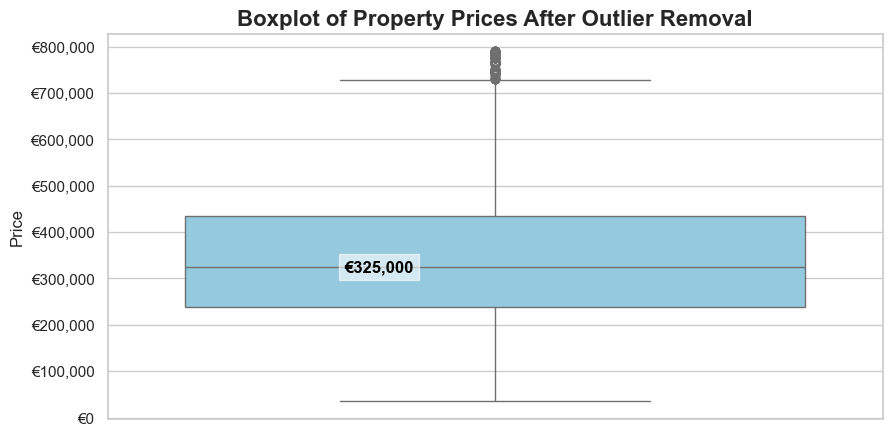

In [180]:
# IQR
# Calculate the upper and lower limits based on IQR
Q1 = df_sorted['Price'].quantile(0.25)
Q3 = df_sorted['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify the indices of rows that are upper and lower outliers
outliers = df_sorted[(df_sorted['Price'] < lower) | (df_sorted['Price'] > upper)].index

# Remove all outliers from the DataFrame
df_cleaned = df_sorted.drop(index=outliers)

# Plot after outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(y='Price', data=df_cleaned, color="skyblue")
plt.title('Boxplot of Property Prices After Outlier Removal', fontsize=16, fontweight='bold')
plt.ylabel('Price')

max_value = df_cleaned['Price'].max()
tick_interval = 100000 if max_value > 500000 else 50000  # Adjust interval for readability
yticks = np.arange(0, max_value + tick_interval, tick_interval)
plt.yticks(yticks, [f'€{y:,.0f}' for y in yticks])  # Format y-tick labels with euro symbol

# Add an annotation for the median value inside the box
median_price = df_cleaned['Price'].median()
plt.text(-0.15, median_price, f'€{median_price:,.0f}', ha='center', va='center', fontsize=12, 
         color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))


plt.show()

### Histogram to compare price distribution before and after outlier removal
The bars in the histogram are grouped into bins based on the range of values they represent. They are essentially ranges of the price values. The width of each bin determines how many values will be grouped together within that bin. For instance, if you have prices ranging from €0 to €1,000,000, and you use 30 bins, each bin would represent a range of approximately €33,333.

Impact of Outliers on Data:
    In the before histogram, the long tail towards the higher end indicates that there were properties significantly more expensive than the rest, causing positive skew.
    In the after histogram, removing these extreme values leads to a more balanced representation of the typical property prices, focusing on the core data.

Central Tendency:
    The peak of the histogram after outlier removal is more indicative of the true central tendency of property prices, as it is not pulled by extreme high values.
    The mean and median values become more representative of the majority of the properties after outliers are removed.    

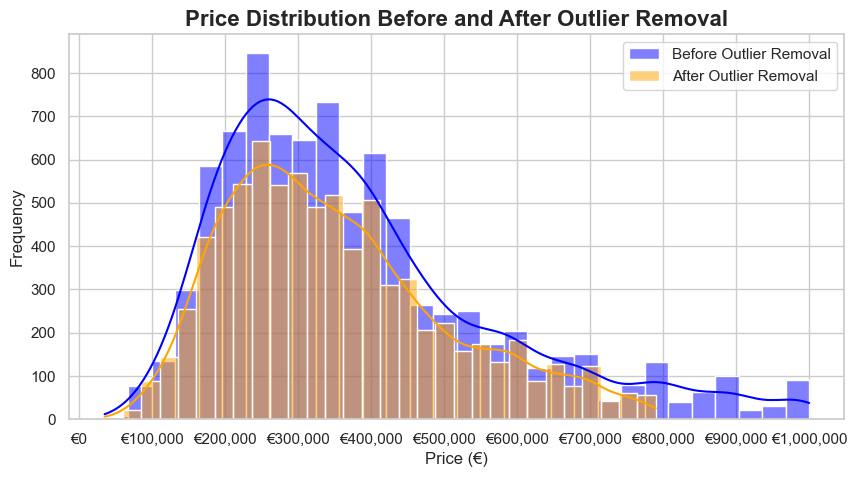

In [181]:
def histogram_outlier_removal(dataset_clean, dataset_outliers):
    plt.figure(figsize=(10, 5))
    # Plot a histogram to compare price distribution before and after outlier removal
    sns.histplot(dataset_outliers['Price'], color='blue', label='Before Outlier Removal', kde=True, bins=30)
    sns.histplot(dataset_clean['Price'], color='orange', label='After Outlier Removal', kde=True, bins=30)
    
    plt.title('Price Distribution Before and After Outlier Removal', fontsize=16, fontweight='bold')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')
    plt.legend()

    # Set x-axis tick labels to add more points, at intervals of 100,000 euros
    max_price = max(dataset_outliers['Price'].max(), dataset_clean['Price'].max())  # Get the maximum value from both datasets
    tick_interval = 100000  # Set tick interval at 100,000 euros
    ticks = np.arange(0, max_price + tick_interval, tick_interval)  # Create an array of tick positions at 100,000 intervals
    plt.xticks(ticks, [f'€{int(x):,}' for x in ticks])  # Set the x-axis tick labels with formatting
    plt.show()
    
histogram_outlier_removal(df_cleaned, df_sorted)

In [182]:
# Filter the DataFrame to find properties with Price > 1,000,000
properties_above_1M = df[df['Price'] > 1000000]
count_above_1M = properties_above_1M.shape[0]
print(f'There are {count_above_1M} properties with a price above 1,000,000.')


There are 677 properties with a price above 1,000,000.


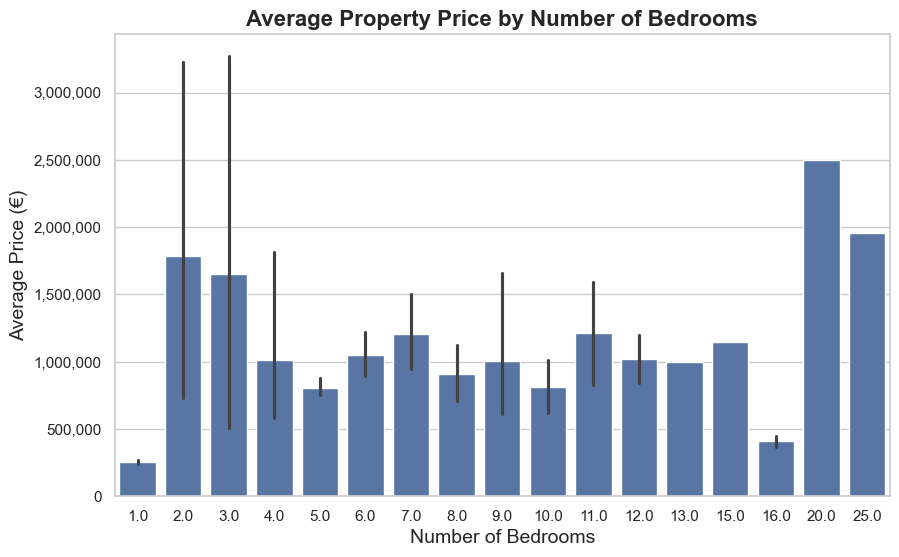

In [183]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot that shows the average price per number of bedrooms
sns.barplot(x="Number of bedrooms", y="Price", data=df, estimator=np.mean, ax=ax)

# Set title and labels
ax.set_title('Average Property Price by Number of Bedrooms', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Bedrooms', fontsize=14)
ax.set_ylabel('Average Price (€)', fontsize=14)

# Format y-axis with commas for thousands separator
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


#### Number of Bedrooms

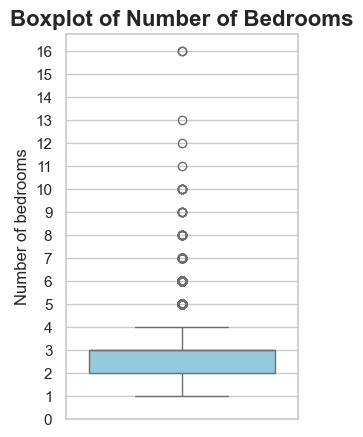

In [184]:
plt.figure(figsize=(3, 5))
sns.boxplot(y='Number of bedrooms', data=df_sorted, color="skyblue")
plt.title('Boxplot of Number of Bedrooms', fontsize=16, fontweight='bold')
plt.ylabel('Number of bedrooms')
# Set y-axis tick labels to add more points (in this case, we use integers for the number of bedrooms)
max_bedrooms = df_sorted['Number of bedrooms'].max()  # Get the maximum number of bedrooms
yticks = np.arange(0, max_bedrooms + 1, 1)  # Create an array of tick positions with a step of 1 (integers only)

plt.yticks(yticks)  # Set the y-axis tick labels to be the integer values of bedrooms

plt.show()


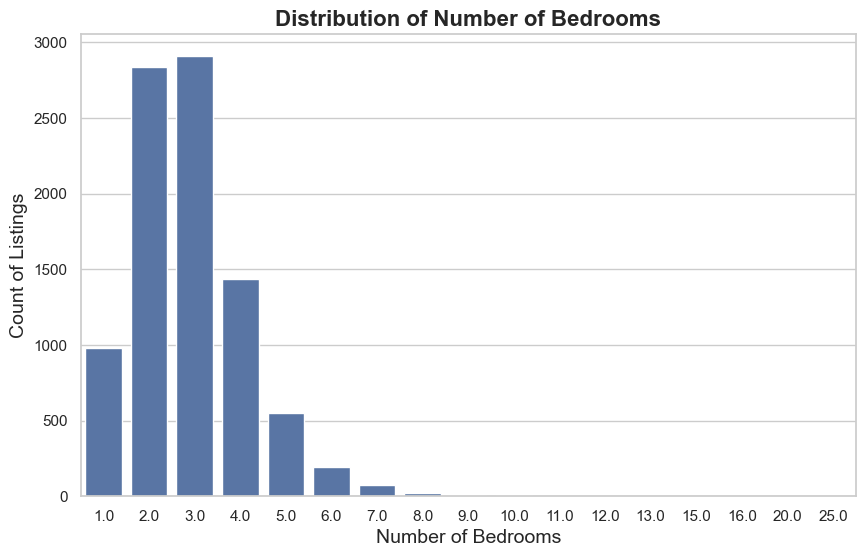

In [185]:
# Barplot for Number of Bedrooms with outliers calculated and removed

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for the number of bedrooms (distribution of bedrooms)
sns.countplot(x="Number of bedrooms", data=df, ax=ax)

# Set title and labels
ax.set_title('Distribution of Number of Bedrooms', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Bedrooms', fontsize=14)
ax.set_ylabel('Count of Listings', fontsize=14)

# IQR
# Calculate the upper and lower limits based on IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Identify the indices of rows that are upper and lower outliers
outliers = df[(df['Price'] < lower) | (df['Price'] > upper)].index

# Remove all outliers from the DataFrame
df_cleaned = df.drop(index=outliers)

plt.show()